In [1]:
#from functions import extract_LAI_from_RAS_file, explore_image, extract_all_LAI_from_RAS_file
import matplotlib.pyplot as plt
#import torch
import numpy as np
#datapath = './dataset/france/lai_ras/'
import random
import glob
import tifffile
filepaths = glob.glob('/home/luser/UniBw-STELAR/dataset/france2/processed_lai_npy/*.npy')

filepaths.sort()

print("filepaths", filepaths)


filepaths ['/home/luser/UniBw-STELAR/dataset/france2/processed_lai_npy/Q_LAI_2020_measure_00.npy', '/home/luser/UniBw-STELAR/dataset/france2/processed_lai_npy/Q_LAI_2020_measure_01.npy', '/home/luser/UniBw-STELAR/dataset/france2/processed_lai_npy/Q_LAI_2020_measure_02.npy', '/home/luser/UniBw-STELAR/dataset/france2/processed_lai_npy/Q_LAI_2020_measure_03.npy', '/home/luser/UniBw-STELAR/dataset/france2/processed_lai_npy/Q_LAI_2020_measure_04.npy', '/home/luser/UniBw-STELAR/dataset/france2/processed_lai_npy/Q_LAI_2020_measure_05.npy', '/home/luser/UniBw-STELAR/dataset/france2/processed_lai_npy/Q_LAI_2020_measure_06.npy', '/home/luser/UniBw-STELAR/dataset/france2/processed_lai_npy/Q_LAI_2020_measure_07.npy', '/home/luser/UniBw-STELAR/dataset/france2/processed_lai_npy/Q_LAI_2020_measure_08.npy', '/home/luser/UniBw-STELAR/dataset/france2/processed_lai_npy/Q_LAI_2020_measure_09.npy', '/home/luser/UniBw-STELAR/dataset/france2/processed_lai_npy/Q_LAI_2020_measure_10.npy', '/home/luser/UniBw-ST

In [2]:
import torch

device = torch.device("cuda")# if torch.cuda.is_available() else "cpu")

In [3]:
device

device(type='cuda')

In [4]:
#len(filepaths)

In [13]:
labels_p = np.load('/home/luser/STELAR_Workbenches/saved_labels/lai_specific_france_mask_10_top.npy')
#labels = torch.from_numpy(labels).to(device)


labels = np.load('/home/luser/UniBw-STELAR/dataset/test_saves/vista_labes_image.npy').astype(np.uint8)


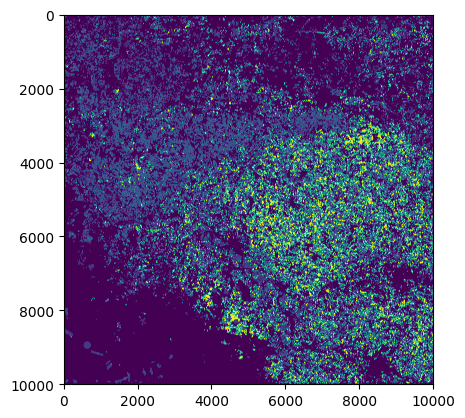

In [14]:
plt.imshow(labels)

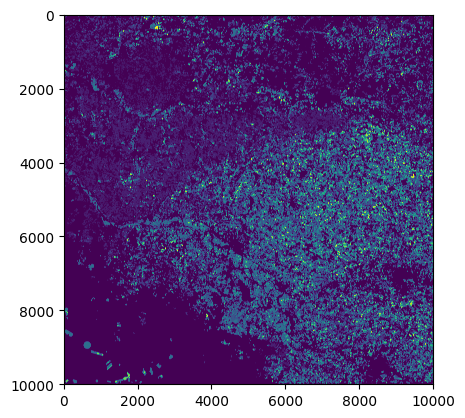

In [15]:
plt.imshow(labels_p)

In [6]:
x_ind = random.choices(range(14), k=64)
y_ind = random.choices(range(14), k=64)


In [7]:
x_ind, y_ind

([1,
  6,
  2,
  6,
  6,
  7,
  8,
  9,
  11,
  11,
  4,
  9,
  0,
  0,
  10,
  8,
  2,
  13,
  4,
  9,
  4,
  9,
  3,
  13,
  11,
  13,
  4,
  5,
  8,
  3,
  1,
  2,
  12,
  4,
  13,
  0,
  12,
  10,
  12,
  0,
  10,
  2,
  12,
  10,
  5,
  13,
  4,
  2,
  1,
  7,
  10,
  4,
  9,
  8,
  3,
  4,
  13,
  7,
  3,
  0,
  1,
  0,
  7,
  0],
 [1,
  7,
  12,
  0,
  12,
  9,
  0,
  4,
  1,
  4,
  13,
  7,
  12,
  3,
  1,
  11,
  13,
  4,
  2,
  2,
  5,
  9,
  0,
  6,
  2,
  8,
  1,
  2,
  2,
  3,
  0,
  9,
  7,
  13,
  13,
  10,
  8,
  2,
  8,
  4,
  6,
  8,
  11,
  4,
  12,
  8,
  6,
  12,
  3,
  0,
  4,
  3,
  9,
  9,
  5,
  3,
  11,
  8,
  5,
  2,
  4,
  1,
  1,
  5])

In [8]:
'''import numpy as np
import tifffile
from io import BytesIO'''

'import numpy as np\nimport tifffile\nfrom io import BytesIO'

In [9]:
'''array = np.random.randint(0, 255, size=(100, 100), dtype=np.uint8)  # Example 2D array

# Convert the array to TIFF format in memory
with BytesIO() as f:
    tifffile.imsave(f, array)

    # Move file pointer to the beginning of the file-like object
    f.seek(0)

    # Load TIFF from the BytesIO object
    tif_array = tifffile.imread(f)'''

'array = np.random.randint(0, 255, size=(100, 100), dtype=np.uint8)  # Example 2D array\n\n# Convert the array to TIFF format in memory\nwith BytesIO() as f:\n    tifffile.imsave(f, array)\n\n    # Move file pointer to the beginning of the file-like object\n    f.seek(0)\n\n    # Load TIFF from the BytesIO object\n    tif_array = tifffile.imread(f)'

In [10]:
#draw_time_index = random.randint(0, 245)
#selcted_time_files = filepaths[draw_time_index:draw_time_index+20]
#big_stack = torch.tensor([]).to(device)

for k in range(100):

    x_ind = random.choices(range(14), k=64)
    y_ind = random.choices(range(14), k=64)

    temporal_batches = torch.tensor([]).to(device)
    spatial_label_batches = torch.tensor([]).to(device)
    for i in range(len(x_ind)):
        time_strip_ind =  np.random.randint(0, len(filepaths)-65)
        considered_filepaths = filepaths[time_strip_ind:time_strip_ind+64]   
        temporal_strip = torch.tensor([]).to(device)

        x_coord = x_ind[i] * 64
        y_coord = y_ind[i] * 64
        
        space_label = labels[x_coord:x_coord+64, y_coord:y_coord+64]
        space_label = torch.from_numpy(space_label).to(device)

        spatial_label_batches = torch.cat((spatial_label_batches, space_label.unsqueeze(0)), axis=0)
        for filepath in considered_filepaths:
            numpy_array = np.load(filepath)
            torch_tensor = torch.from_numpy(numpy_array).to(device)
            numpy_array = 0.0

            #print(torch_tensor[x_coord:x_coord+64, y_coord:y_coord+64].shape)
            #temporal_strip.append(torch_tensor[x_coord:x_coord+64, y_coord:y_coord+64])
            temporal_strip = torch.cat((temporal_strip, torch_tensor[x_coord:x_coord+64, y_coord:y_coord+64].unsqueeze(0)), axis=0)
            #print("temporal_strip.shape", temporal_strip.shape)
        temporal_batches = torch.cat((temporal_batches, temporal_strip.unsqueeze(0)) , axis=0)

    print("temporal_batches.shape", temporal_batches.shape)
    print("spatial_label_batches.shape", spatial_label_batches.shape)

    array_lai = temporal_batches.cpu().numpy()
    tifffile.imsave('/home/luser/stelar_3d/storage/train'+str(k)+'.tif', array_lai)


    array_lab = spatial_label_batches.cpu().numpy()
    tifffile.imsave('/home/luser/stelar_3d/storage/lab'+str(k)+'.tif', array_lab)


temporal_batches.shape torch.Size([64, 64, 64, 64])
spatial_label_batches.shape torch.Size([64, 64, 64])


/tmp/ipykernel_247208/1445556450.py:39: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave('/home/luser/stelar_3d/storage/train'+str(k)+'.tif', array_lai)
/tmp/ipykernel_247208/1445556450.py:43: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave('/home/luser/stelar_3d/storage/lab'+str(k)+'.tif', array_lab)


temporal_batches.shape torch.Size([64, 64, 64, 64])
spatial_label_batches.shape torch.Size([64, 64, 64])
temporal_batches.shape torch.Size([64, 64, 64, 64])
spatial_label_batches.shape torch.Size([64, 64, 64])
temporal_batches.shape torch.Size([64, 64, 64, 64])
spatial_label_batches.shape torch.Size([64, 64, 64])
temporal_batches.shape torch.Size([64, 64, 64, 64])
spatial_label_batches.shape torch.Size([64, 64, 64])
temporal_batches.shape torch.Size([64, 64, 64, 64])
spatial_label_batches.shape torch.Size([64, 64, 64])
temporal_batches.shape torch.Size([64, 64, 64, 64])
spatial_label_batches.shape torch.Size([64, 64, 64])
temporal_batches.shape torch.Size([64, 64, 64, 64])
spatial_label_batches.shape torch.Size([64, 64, 64])
temporal_batches.shape torch.Size([64, 64, 64, 64])
spatial_label_batches.shape torch.Size([64, 64, 64])
temporal_batches.shape torch.Size([64, 64, 64, 64])
spatial_label_batches.shape torch.Size([64, 64, 64])
temporal_batches.shape torch.Size([64, 64, 64, 64])
spa

KeyboardInterrupt: 

In [10]:
torch.save(temporal_batches, '/home/luser/stelar_3d/storage/temporal_batches.pth')
torch.save(spatial_label_batches, '/home/luser/stelar_3d/storage/temporal_batches.pth')



In [28]:
temporal_batches.shape, spatial_label_batches.shape

(torch.Size([64, 64, 64, 64]), torch.Size([64, 64, 64]))

In [30]:
torch.unique(spatial_label_batches)

tensor([0., 1., 2., 4., 6., 9.], device='cuda:0')

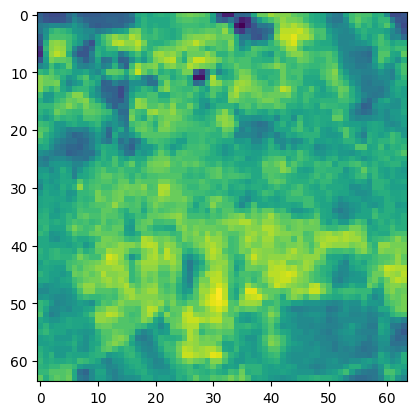

In [16]:
plt.imshow(temporal_batches[0, 2, :, :].cpu().numpy())

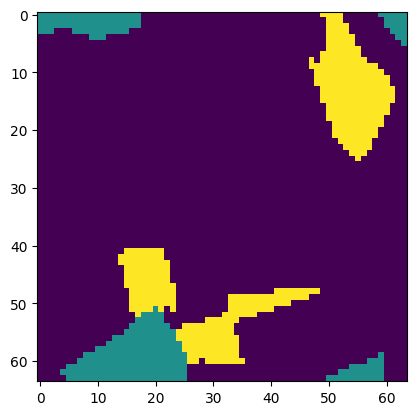

In [17]:
plt.imshow(spatial_label_batches[0, :, :].cpu().numpy())

In [12]:
import tifffile

In [13]:
array_lai = temporal_batches.cpu().numpy()
tifffile.imsave('/home/luser/stelar_3d/storage/train.tif', array_lai)


/tmp/ipykernel_152108/2507284344.py:2: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave('/home/luser/stelar_3d/storage/train.tif', array_lai)


In [14]:
array_lab = spatial_label_batches.cpu().numpy()
tifffile.imsave('/home/luser/stelar_3d/storage/lab.tif', array_lab)

/tmp/ipykernel_152108/2138688997.py:2: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave('/home/luser/stelar_3d/storage/lab.tif', array_lab)


In [40]:
def create_time_stack(t_points, big_stack, labels,  x_indices, y_indices, index=0, time_stacks=None, corresponding_labels=None):
    if time_stacks is None:
        time_stacks = []
        corresponding_labels = []
    if index >= len(t_points):
        return torch.cat(time_stacks, dim=0), torch.cat(corresponding_labels, dim=0)
    t_coord = t_points[index]
    x_index = x_indices[index]
    y_index = y_indices[index]
    x_coord = x_index * 366
    y_coord = y_index * 366
    time_stack = big_stack[t_coord:t_coord+6, x_coord:x_coord+366, y_coord:y_coord+366]
    corresponding_label = labels[x_coord:x_coord+366, y_coord:y_coord+366]
    time_stack = time_stack.unsqueeze(0)
    corresponding_label = corresponding_label.unsqueeze(0)
    time_stacks.append(time_stack)
    corresponding_labels.append(corresponding_label)
    return create_time_stack(t_points, big_stack, labels, x_indices, y_indices, index+1, time_stacks, corresponding_labels)
batch_size = 8
x_indices = torch.randint(0, 27, (batch_size,))
y_indices = torch.randint(0, 27, (batch_size,))
t_points = random.sample(range(14), k=batch_size)
t_points_tensor = torch.tensor(t_points)
batch_time_stacks, corresp_labels = create_time_stack(t_points, big_stack, labels, x_indices, y_indices)
batch_time_stacks_expanded = batch_time_stacks.unsqueeze(2).repeat(1, 1, 4, 1, 1)

torch.Size([8, 6, 366, 366])


In [41]:
batch_time_stacks_expanded.shape

torch.Size([8, 6, 4, 366, 366])

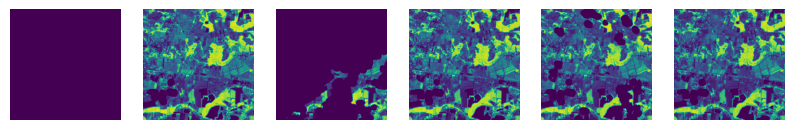

In [42]:
import matplotlib.pyplot as plt
with torch.no_grad():
    fig = plt.figure(figsize=(10,10))
    for i in range(6):
        plt.subplot(1, 6,i+1)
        plt.imshow(batch_time_stacks[7, i,:, :].cpu().numpy())
        plt.axis('off')
    #plt.savefig('input_images.png')
    plt.show()

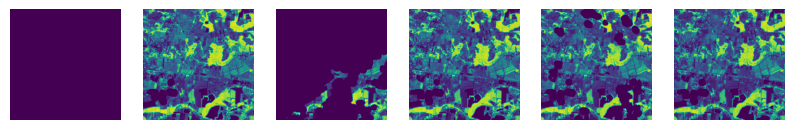

In [43]:
import matplotlib.pyplot as plt
with torch.no_grad():
    fig = plt.figure(figsize=(10,10))
    for i in range(6):
        plt.subplot(1, 6,i+1)
        plt.imshow(batch_time_stacks_expanded[7, i, 0 ,:, :].cpu().numpy())
        plt.axis('off')
    #plt.savefig('input_images.png')
    plt.show()

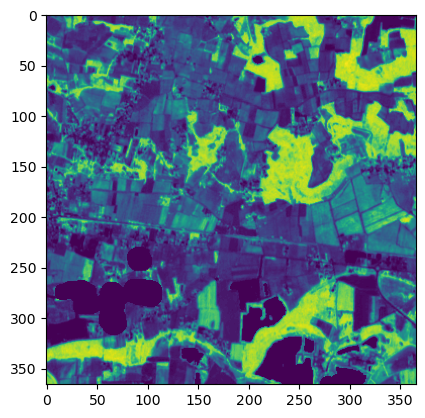

In [45]:
plt.imshow(batch_time_stacks_expanded[7, 5, 0 ,:, :].cpu().numpy())


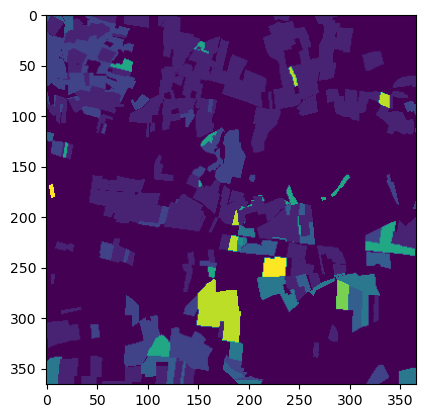

In [44]:
plt.imshow(corresp_labels[7].cpu().numpy())

In [19]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [22]:
patch_len_x = 256
patch_len_y = 256

min_record = 0
max_record = concatenated_tensor.shape[0]
print("max_record", max_record)
record_num_inds = 8
record_rand_list = np.random.randint(min_record, max_record, record_num_inds)



ind_i_min = 0
ind_i_max = concatenated_tensor.shape[1]//patch_len_x
print("ind_i_max", ind_i_max)
ind_i_num_inds = 20
ind_i_rand_list = np.random.randint(ind_i_min, ind_i_max, ind_i_num_inds)


ind_j_min = 0
ind_j_max = concatenated_tensor.shape[2]//patch_len_y
print("ind_j_max", ind_j_max)
ind_j_num_inds = 20
ind_j_rand_list = np.random.randint(ind_j_min, ind_j_max, ind_j_num_inds)


print("ind_i_rand_list", ind_i_rand_list)
print("ind_j_rand_list", ind_j_rand_list)

all_selected_patches = []
all_selected_labels = []
for record in record_rand_list:
    for ind_i in ind_i_rand_list:
        for ind_j in ind_j_rand_list:

            selected_patch = concatenated_tensor[record][(ind_i * patch_len_x):((ind_i + 1) * patch_len_x), (ind_j * patch_len_y):((ind_j + 1) * patch_len_y)]
            selected_labels = gpu_labels_resized[0][(ind_i * patch_len_x):((ind_i + 1) * patch_len_x), (ind_j * patch_len_y):((ind_j + 1) * patch_len_y)]
            all_selected_patches.append(selected_patch)
            all_selected_labels.append(selected_labels)

all_selected_patches_cat = torch.stack(all_selected_patches, dim=0)
all_selected_labels_cat = torch.stack(all_selected_labels, dim=0)

image_splits = all_selected_patches_cat.reshape(-1, patch_len_x, patch_len_y, 1)

label_splits = all_selected_labels_cat.reshape(-1, patch_len_x, patch_len_y, 1)

max_record 11
ind_i_max 39
ind_j_max 39
ind_i_rand_list [36 29 20 22  1 12 35 34 13  4 35  7  0 24 14  5 19 37 22 36]
ind_j_rand_list [12 27 29 18 25 23  4 19 38 38 23 23 29 17 36 34 38 18  9 15]


In [ ]:
image_splits = image_splits.unsqueeze(1)

In [23]:
image_splits.shape, label_splits.shape

(torch.Size([3200, 256, 256, 1]), torch.Size([3200, 256, 256, 1]))

In [156]:
import torch
import torch.nn as nn

class UNet(nn.Module):
    def __init__(self, in_channels, n_classes):
        super(UNet, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.encoder2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.encoder3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.encoder4 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.center = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

        # Decoder
        self.decoder4 = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),
            nn.Conv2d(128 , 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

        self.decoder3 = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

        self.decoder2 = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
            nn.Conv2d(32 , 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 16, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

        self.decoder1 = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),
            nn.Conv2d(16 , 16, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(16, 1, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

        # Output layer
        self.outconv = nn.Conv2d(1, n_classes, kernel_size=1)

    def forward(self, x):
        # Encoder
        x1 = self.encoder(x)
        x2 = self.encoder2(x1)
        x3 = self.encoder3(x2)
        x4 = self.encoder4(x3)

        # Center
        center = self.center(x4)

        # Decoder
        check =torch.cat([center, x4], dim=1)
        d4 = self.decoder4(torch.cat([center, x4], dim=1))
        d3 = self.decoder3(torch.cat([d4, x3], dim=1))
        d2 = self.decoder2(torch.cat([d3, x2], dim=1))
        d1 = self.decoder1(torch.cat([d2, x1], dim=1))

        # Output
        #output = self.outconv(d1)
        output = d1

        return output

# Create the U-Net model
in_channels = 1  # For grayscale images
n_classes = 41  # Number of output classes
model = UNet(in_channels, n_classes).to(device)

# Print the model architecture
print(model)


UNet(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (encoder2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (encoder3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (encoder4): Sequential(
    (0): C

In [157]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [158]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

# Data Preparation
transform = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [159]:
num_epochs = 40
criterion = nn.MSELoss().to(device)


for epoch in range(num_epochs):
    for batch in train_loader:
        inputs, _ = batch
        optimizer.zero_grad()
        outputs = model(inputs.to(device))
        loss = criterion(outputs, inputs.to(device))
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

KeyboardInterrupt: 

In [142]:
outputs = model(inputs.to(device))

In [143]:
outputs.shape

torch.Size([64, 1, 256, 256])

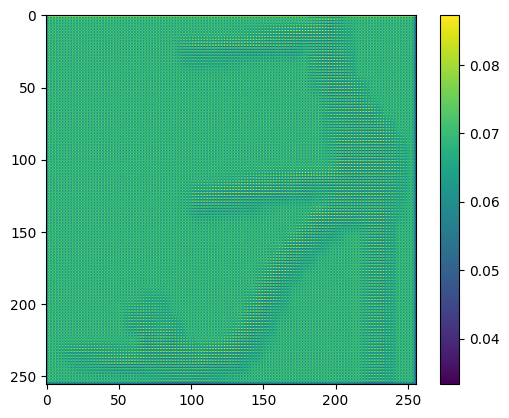

In [146]:
plt.imshow(outputs[0][0].cpu().detach().numpy())
plt.colorbar()

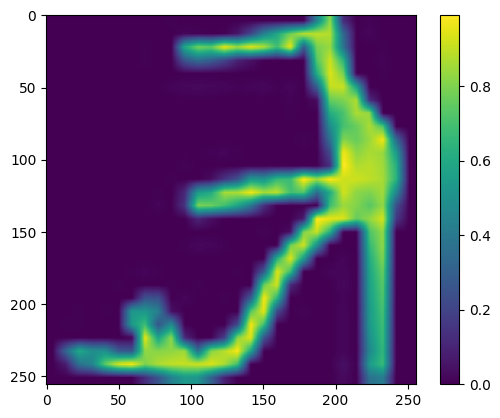

In [147]:
plt.imshow(inputs[0][0].cpu().detach().numpy())
plt.colorbar()